### Workings for Ruhapeu ski resport ###

---

In [1]:
using Plots
using Formatting
fmt = "%.2f"

function BEP(fc, p, vc)
    q = fc/(p-vc)
    return q
end

BEP (generic function with 1 method)

---

### Part 1 ###

Solution requires a two step approach. 

- First: determine the relevant break-even point to determine the numbers of skiers needed to ... break even. 
- Second: determine capacity to figure out if the resort can deliver the number is rides to break even.

Inputs:

In [2]:
p = 60.0
vc = 200/100
fc = 8300000 + 4100000
skier_runs_day = 2
skier_per_hour = 540;

In [3]:
printfmt("{1:s}: \${2:s}\n", "Fixed cost", format(fc, commas=true))
printfmt("{1:s}{2:.2f}\n", "Revenue per skier day: \$", p)
printfmt("{1:s}{2:.2f}\n", "Variable cost per skier day: \$", vc)
printfmt("{1:s}{2:.2f}\n", "Contribution per skier day: \$", p-vc)
printfmt("{1:s}: {2:.2f}.", "Skier runs per day", skier_runs_day)

Fixed cost: $12,400,000
Revenue per skier day: $60.00
Variable cost per skier day: $2.00
Contribution per skier day: $58.00
Skier runs per day: 2.00.

---

**Step 1: Break even calculations in skier days, rounded up (hence the use of *ceil*: ceiling):**

In [4]:
bep = ceil(BEP(fc, p, vc))
printfmt("{1:s}: {2:s}.\n", "\nBreak even point in skier days", format(bep, commas=true, precision=0))


Break even point in skier days: 213,794.


In [5]:
function chairs_to_bep(bep, skier_runs_day)
    chair_lifts = bep * skier_runs_day
    return chair_lifts
end

ch_2_bep = chairs_to_bep(bep, skier_runs_day)
printfmt("{1:s}: {2:s}.\n", "\nChair lifts needed to meet BEP", format(ch_2_bep, commas=true, precision=0))


Chair lifts needed to meet BEP: 427,588.


---

**Step 2: Calculate capacity**

In [6]:
function lift_capacity(hours, skiers_hour, seasondays, skier_runs_day)
    chair_lifts = hours * skiers_hour * seasondays
    return chair_lifts / skier_runs_day
end

capchairs = lift_capacity(8, skier_per_hour, 120, 1)
printfmt("{1:s}: {2:s} chairs.\n\n", "\nLift capacity", format(capchairs, commas=true, precision=0))

printfmt("But every ride in the chair lift serves two skiers.\n\n")

capskiers = lift_capacity(8, skier_per_hour, 120, skier_runs_day)

printfmt("{1:s}: {2:s} skiers (What we have).\n", "Lift capacity", format(capskiers, commas=true, precision=0))
printfmt("{1:s}: {2:s} (What we need).\n", "Break even point in skiers per day", format(bep, commas=true, precision=0))
printfmt("{1:s}: {2:s} percent.", "Capacity usage", format(100 * ch_2_bep/capchairs, commas=true, precision=2))


Lift capacity: 518,400 chairs.

But every ride in the chair lift serves two skiers.

Lift capacity: 259,200 skiers (What we have).
Break even point in skiers per day: 213,794 (What we need).
Capacity usage: 82.48 percent.

---

**Plotting**

In [7]:
function TC(q, fc, vc) # Total cost
    tc = fc + vc*q
    return tc
end

TC (generic function with 1 method)

In [8]:
function Rev(q, p) # Total revenue
    r = p*q
    return r
end

Rev (generic function with 1 method)

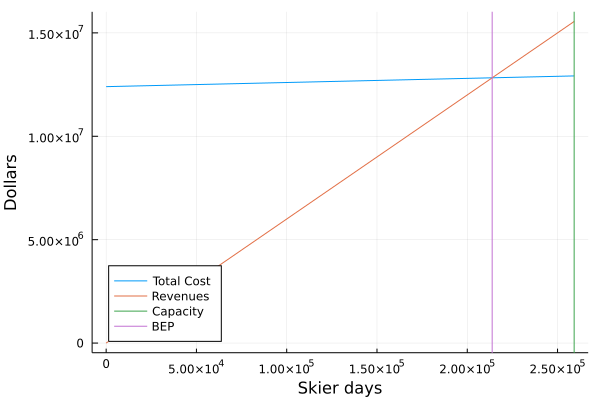

In [9]:
plot(q -> TC(q, fc, vc), 0, capskiers, xlabel= "Skier days", ylabel="Dollars", label="Total Cost", legend=:bottomleft)
plot!(q-> Rev(q, p),     0, capskiers, label ="Revenues")
plot!([capskiers], seriestype = "vline", label="Capacity")
plot!([bep],       seriestype = "vline", label="BEP")

As you can see, the BEP is too close to full capacity. The break-even calculation ignores bad weather, and all sorts of factors that may deliver less skiers. Chances are that the break even number of skiers or rides won't be met. Not worth investing.


----

### Part 2 ###

Calculate BEPs using amended numbers for fixed cost and capacity usage. 

In [10]:
fc2 = fc + 75000
skier_per_hour2 = 720

printfmt("{1:s}: \${2:s}\n", "Fixed cost", format(fc2, commas=true))
printfmt("{1:s}{2:.2f}\n", "Price per skier day: \$", p)
printfmt("{1:s}{2:.2f}\n", "Variable cost per skier day: \$", vc)
printfmt("{1:s}{2:.2f}\n", "Contribution per skier day: \$", p-vc)
printfmt("{1:s}: {2:.2f}.\n", "Skier runs per day", skier_runs_day)

bep2 = ceil(BEP(fc2, p, vc))
printfmt("{1:s}: {2:s}.\n", "Break even point in skiers per day", format(bep2, commas=true, precision=0))

ch_2_bep2 = chairs_to_bep(bep2, skier_runs_day)
printfmt("{1:s}: {2:s}.\n", "Chair lifts to BEP", format(ch_2_bep2, commas=true, precision=0))

Fixed cost: $12,475,000
Price per skier day: $60.00
Variable cost per skier day: $2.00
Contribution per skier day: $58.00
Skier runs per day: 2.00.
Break even point in skiers per day: 215,087.
Chair lifts to BEP: 430,174.


---

Calculate capacity

In [11]:
capchairs2 = lift_capacity(8, skier_per_hour2, 120, 1)
printfmt("{1:s}: {2:s} chairs.\n\n", "\nNew lift capacity", format(capchairs2, commas=true, precision=0))

capskiers2 = lift_capacity(8, skier_per_hour2, 120, skier_runs_day)

printfmt("{1:s}: {2:s} skiers (What we have).\n", "New lift capacity", format(capskiers2, commas=true, precision=0))
printfmt("{1:s}: {2:s} (What we need).\n", "New break even point in skiers per day", format(bep2, commas=true, precision=0))
printfmt("{1:s}: {2:s} percent.\n", "New capacity usage", format(100*ch_2_bep2/capchairs2, commas=true, precision=2))


New lift capacity: 691,200 chairs.

New lift capacity: 345,600 skiers (What we have).
New break even point in skiers per day: 215,087 (What we need).
New capacity usage: 62.24 percent.


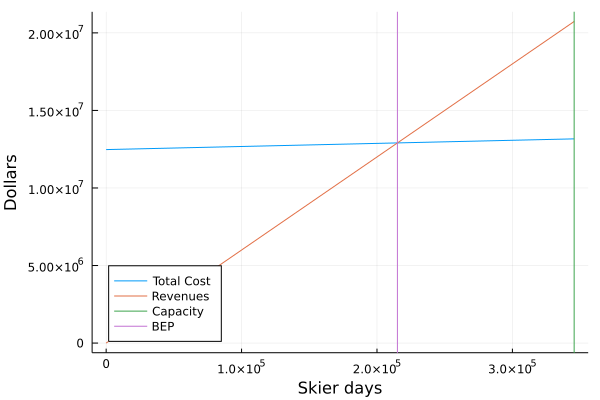

In [12]:
plot(q -> TC(q, fc2, vc), 0, capskiers2, xlabel= "Skier days", ylabel="Dollars", label="Total Cost", legend=:bottomleft)
plot!(q-> Rev(q, p),     0,  capskiers2, label="Revenues")
plot!([capskiers2], seriestype = "vline", label="Capacity")
plot!([bep2],       seriestype = "vline", label="BEP")

Much better!

Thanks to Accounting for Decision Making and Control by Jerold Zimmerman.